In [1]:
import networkx as nx

from manim import *

from selma import BACKGROUND
from selma.graph import gvlayout_factory, test_draw, MGraph
from selma.datastructures import MQueue

config.background_color = BACKGROUND

In [2]:
edges = [
  ('Acciaiuoli', 'Medici'),
  ('Medici', 'Barbadori'),
  ('Medici', 'Ridolfi'),
  ('Medici', 'Tornabuoni'),
  ('Medici', 'Albizzi'),
  ('Medici', 'Salviati'),
  ('Castellani', 'Peruzzi'),
  ('Castellani', 'Strozzi'),
  # ('Castellani', 'Barbadori'),
  ('Peruzzi', 'Strozzi'),
  ('Peruzzi', 'Bischeri'),
  ('Strozzi', 'Ridolfi'),
  ('Strozzi', 'Bischeri'),
  ('Ridolfi', 'Tornabuoni'),
  ('Tornabuoni', 'Guadagni'),
  ('Albizzi', 'Ginori'),
  ('Albizzi', 'Guadagni'),
  ('Salviati', 'Pazzi'),
  ('Bischeri', 'Guadagni'),
  ('Guadagni', 'Lamberteschi'),
  #
  ('Ginori', 'Acciaiuoli'),
  ('Barbadori', 'Castellani'),
]
G = nx.DiGraph(edges)

In [3]:
#G = nx.erdos_renyi_graph(20, 0.3, directed=True)
#G = nx.relabel_nodes(G, lambda _: str(_) + 'lungo')

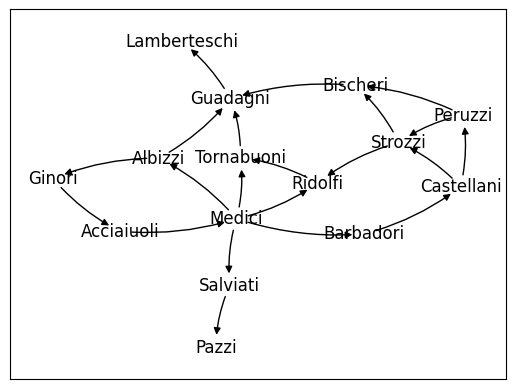

In [4]:
layout = gvlayout_factory('neato', heightscale=0.7)
test_draw(G, layout)

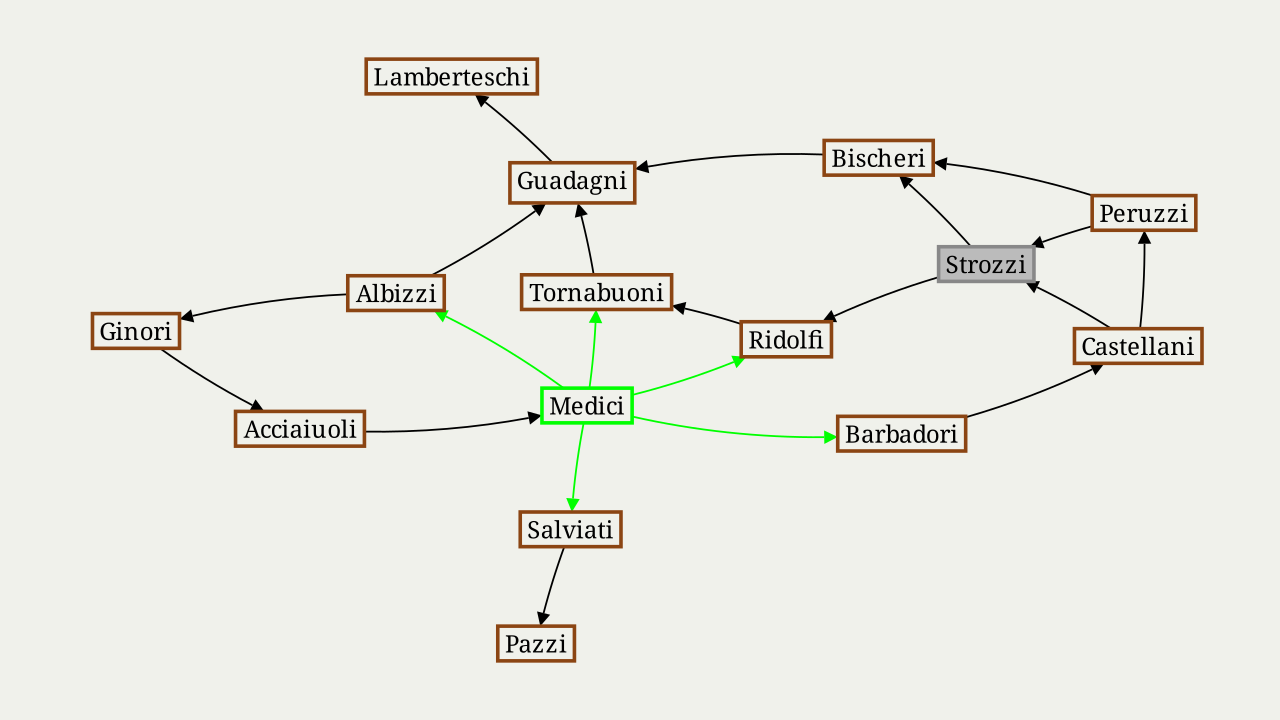

In [5]:
%%manim --hide-splash -qm -v WARNING Draw

HIGHLIGHT = YELLOW


class Draw(Scene):
  def construct(self):
    MG = MGraph(G, layout, node_scale=.6)
    self.add(MG.mgraph)

    def mark(n):
      mn = MG.mnode(n)
      mn[0].set_fill(color=GRAY_B, opacity=1)
      mn.set(stroke_color=GRAY)

    def highlight(s, color):
      ms = MG.mnode(s)
      ms.set(stroke_color=color)
      for t in G.neighbors(s):
        MG.medge(s, t).set_color(color)
      
    mark('Strozzi')
    highlight('Medici', PURE_GREEN)
    # MG.mnode('Medici')[0].set_fill(color=HIGHLIGHT, opacity=.3)
    # MG.medge('Medici', 'Ridolfi').set_color(HIGHLIGHT)


In [ ]:
%%manim --renderer=cairo --hide-splash -qm -v WARNING BFS
#%%manim --renderer=opengl --hide-splash -pqm -v WARNING BFS


class BFS(Scene):
  def construct(self):
    Q = MQueue(scale=0.6, width=12)
    self.add(Q.rect.to_edge(UP))
    MG = MGraph(G, layout, scale=0.8, node_scale=0.6)
    MG.shift(DOWN / 2)
    self.add(MG.mgraph)

    dot = Dot(color=PURE_GREEN)
    def highlight(s, turnon):
      color = PURE_GREEN if turnon else BLACK
      ms = MG.mnode(s)
      ms.set(stroke_color=color)
      if turnon: 
        dot.move_to(ms.get_center())
        self.add(dot)
      for t in G.neighbors(s):
        MG.medge(s, t).set_color(color)
      if turnoff:
        self.remove(dot)
      
    def enqueue(n):
      if n in enqueue.nodes:
        return
      enqueue.nodes.add(n)
      mn = MG.mnode(n)
      mn[0].set_fill(color=GRAY_B, opacity=1)
      mn.set(stroke_color=GRAY_B)
      self.play(Q.enqueue(mn.copy()), run_time=0.5)
    enqueue.nodes = set()

    start = 'Medici'

    enqueue(start)
    while Q.queue:
      e = Q.queue[-1][1].text
      self.play(Q.dequeue())
      highlight(e, True)
      self.wait(1)
      for t in G.neighbors(e):
        self.play(MG.movealong(dot, e, t), run_time=0.5)
        enqueue(t)
      highlight(e, False)
